In [94]:
import pickle
import sys
import numpy as np
import imageio
import matplotlib.pyplot as plt

sys.path.append("/home/niaki/Projects/inpynting")
from data_structures import Image2BInpainted
from data_structures import Node, coordinates_to_position, position_to_coordinates

In [44]:
def rmse(a, b):
    # Normalised and has physical meaning
    return np.sqrt(np.mean(np.subtract(a, b, dtype=float)**2))

In [45]:
def ssd(a, b):
    return np.sum(np.subtract(a, b, dtype=np.int32) ** 2)

In [46]:
pickle_patches_file_path = '/home/niaki/Code/inpynting_images/pickles/eeo_global_vars_Jian3_degra_initialization.pickle'
try:
    nodes, nodes_count, nodes_order = pickle.load(open(pickle_patches_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [97]:
grey_rgb = [0, 0, 0]
labels_diameter = 100
mask_thresh = 254
image_rgb = imageio.imread("/home/niaki/Code/inpynting_images/Tijana/Jian3_uint8/Jian3_degra.png")
mask = imageio.imread("/home/niaki/Code/inpynting_images/Tijana/Jian3_uint8/Jian3Mask_inverted.png")
if len(mask.shape) == 3:
    mask = mask[:, :, 0]
mask = np.greater_equal(mask, mask_thresh).astype(np.uint8)
mask = np.array(mask)

cyan = [0, 0, 0]  # [127, 127, 127]  # [0, 255, 255]
image_rgb[mask.astype(bool), :] = cyan


patch_size = 16
stride = patch_size // 2
image = Image2BInpainted(image_rgb, mask, edges=None, patch_size=patch_size, stride=stride)

In [60]:
node = nodes[47016]
node_rgb = image.rgb[node.x_coord: node.x_coord + image.patch_size, node.y_coord: node.y_coord + image.patch_size]
mask = image.mask[node.x_coord: node.x_coord + image.patch_size, node.y_coord: node.y_coord + image.patch_size]

In [63]:
for y_compare in range(max(node.y_coord - labels_diameter, 0),
                       min(node.y_coord + labels_diameter, image.width - image.patch_size + 1)):
    for x_compare in range(max(node.x_coord - labels_diameter, 0),
                           min(node.x_coord + labels_diameter, image.height - image.patch_size + 1)):

        patch_compare_mask_overlap = image.mask[x_compare: x_compare + image.patch_size, y_compare: y_compare + image.patch_size]
        patch_compare_mask_overlap_nonzero_elements = np.count_nonzero(patch_compare_mask_overlap)

        if patch_compare_mask_overlap_nonzero_elements == 0:
            patch_compare_rgb = image.rgb[x_compare: x_compare + image.patch_size, y_compare: y_compare + image.patch_size, :]
            patch_compare_rgb[mask.astype(bool), :] = grey_rgb
            patch_difference = rmse(node_rgb, patch_compare_rgb)
            patch_compare_position = coordinates_to_position(x_compare, y_compare, image.height, image.patch_size)
            node.differences[patch_compare_position] = patch_difference

In [64]:
node.differences

{24408: 43.64427702078093,
 24409: 37.71302341919389,
 24410: 34.249980991478914,
 24411: 30.840525625114324,
 24412: 26.968756035148033,
 24413: 25.14957856671426,
 24414: 20.443615293044427,
 24415: 14.822254172358535,
 24416: 14.822254172358535,
 24417: 14.822254172358535,
 24418: 14.822254172358535,
 24419: 14.822254172358535,
 24420: 14.822254172358535,
 24421: 14.822254172358535,
 24422: 14.822254172358535,
 24423: 14.822254172358535,
 24424: 14.822254172358535,
 24425: 14.822254172358535,
 24426: 14.822254172358535,
 24427: 14.822254172358535,
 24428: 14.822254172358535,
 24429: 14.822254172358535,
 24430: 14.822254172358535,
 24431: 14.822254172358535,
 24432: 14.822254172358535,
 24433: 14.822254172358535,
 24434: 14.822254172358535,
 24435: 14.822254172358535,
 24436: 14.822254172358535,
 24437: 14.822254172358535,
 24438: 14.822254172358535,
 24439: 14.822254172358535,
 24440: 14.822254172358535,
 24441: 14.822254172358535,
 24442: 14.822254172358535,
 24443: 14.822254172358

In [66]:
node_differences_ssd = {}
for y_compare in range(max(node.y_coord - labels_diameter, 0),
                       min(node.y_coord + labels_diameter, image.width - image.patch_size + 1)):
    for x_compare in range(max(node.x_coord - labels_diameter, 0),
                           min(node.x_coord + labels_diameter, image.height - image.patch_size + 1)):

        patch_compare_mask_overlap = image.mask[x_compare: x_compare + image.patch_size, y_compare: y_compare + image.patch_size]
        patch_compare_mask_overlap_nonzero_elements = np.count_nonzero(patch_compare_mask_overlap)

        if patch_compare_mask_overlap_nonzero_elements == 0:
            patch_compare_rgb = image.rgb[x_compare: x_compare + image.patch_size, y_compare: y_compare + image.patch_size, :]
            patch_compare_rgb[mask.astype(bool), :] = grey_rgb
            patch_difference = ssd(node_rgb, patch_compare_rgb)
            patch_compare_position = coordinates_to_position(x_compare, y_compare, image.height, image.patch_size)
            node_differences_ssd[patch_compare_position] = patch_difference

In [67]:
node_differences_ssd

{24408: 1462904,
 24409: 1092305,
 24410: 900911,
 24411: 730474,
 24412: 558577,
 24413: 485761,
 24414: 320979,
 24415: 168729,
 24416: 168729,
 24417: 168729,
 24418: 168729,
 24419: 168729,
 24420: 168729,
 24421: 168729,
 24422: 168729,
 24423: 168729,
 24424: 168729,
 24425: 168729,
 24426: 168729,
 24427: 168729,
 24428: 168729,
 24429: 168729,
 24430: 168729,
 24431: 168729,
 24432: 168729,
 24433: 168729,
 24434: 168729,
 24435: 168729,
 24436: 168729,
 24437: 168729,
 24438: 168729,
 24439: 168729,
 24440: 168729,
 24441: 168729,
 24442: 168729,
 24443: 168729,
 24444: 168729,
 24445: 168729,
 24446: 168729,
 24447: 168729,
 24448: 168729,
 24449: 168729,
 24450: 168729,
 24451: 168729,
 24452: 168729,
 24453: 168729,
 24454: 168729,
 24455: 168729,
 24456: 168729,
 24457: 168729,
 24458: 168729,
 24459: 168729,
 24460: 168729,
 24461: 168729,
 24462: 168729,
 24463: 168729,
 24464: 168729,
 24465: 168729,
 24466: 168729,
 24467: 168729,
 24468: 168729,
 24469: 168729,
 24470

In [87]:
sorted_differences = sorted(node.differences.items(), key=lambda kv: kv[1])[:10000] #, reverse=True
# node.pruned_labels = [label for (label, diff) in sorted_differences]

In [90]:
sorted_differences

[(24415, 14.822254172358535),
 (24416, 14.822254172358535),
 (24417, 14.822254172358535),
 (24418, 14.822254172358535),
 (24419, 14.822254172358535),
 (24420, 14.822254172358535),
 (24421, 14.822254172358535),
 (24422, 14.822254172358535),
 (24423, 14.822254172358535),
 (24424, 14.822254172358535),
 (24425, 14.822254172358535),
 (24426, 14.822254172358535),
 (24427, 14.822254172358535),
 (24428, 14.822254172358535),
 (24429, 14.822254172358535),
 (24430, 14.822254172358535),
 (24431, 14.822254172358535),
 (24432, 14.822254172358535),
 (24433, 14.822254172358535),
 (24434, 14.822254172358535),
 (24435, 14.822254172358535),
 (24436, 14.822254172358535),
 (24437, 14.822254172358535),
 (24438, 14.822254172358535),
 (24439, 14.822254172358535),
 (24440, 14.822254172358535),
 (24441, 14.822254172358535),
 (24442, 14.822254172358535),
 (24443, 14.822254172358535),
 (24444, 14.822254172358535),
 (24445, 14.822254172358535),
 (24446, 14.822254172358535),
 (24447, 14.822254172358535),
 (24448, 1

In [83]:
sorted_differences_ssd = sorted(node_differences_ssd.items(), key=lambda kv: kv[1])[:100] #, reverse=True

In [84]:
sorted_differences_ssd

[(24415, 168729),
 (24416, 168729),
 (24417, 168729),
 (24418, 168729),
 (24419, 168729),
 (24420, 168729),
 (24421, 168729),
 (24422, 168729),
 (24423, 168729),
 (24424, 168729),
 (24425, 168729),
 (24426, 168729),
 (24427, 168729),
 (24428, 168729),
 (24429, 168729),
 (24430, 168729),
 (24431, 168729),
 (24432, 168729),
 (24433, 168729),
 (24434, 168729),
 (24435, 168729),
 (24436, 168729),
 (24437, 168729),
 (24438, 168729),
 (24439, 168729),
 (24440, 168729),
 (24441, 168729),
 (24442, 168729),
 (24443, 168729),
 (24444, 168729),
 (24445, 168729),
 (24446, 168729),
 (24447, 168729),
 (24448, 168729),
 (24449, 168729),
 (24450, 168729),
 (24451, 168729),
 (24452, 168729),
 (24453, 168729),
 (24454, 168729),
 (24455, 168729),
 (24456, 168729),
 (24457, 168729),
 (24458, 168729),
 (24459, 168729),
 (24460, 168729),
 (24461, 168729),
 (24462, 168729),
 (24463, 168729),
 (24464, 168729),
 (24465, 168729),
 (24466, 168729),
 (24467, 168729),
 (24468, 168729),
 (24469, 168729),
 (24470, 1

In [91]:
position_to_coordinates(24415, image.height, image.patch_size)

(7, 108)

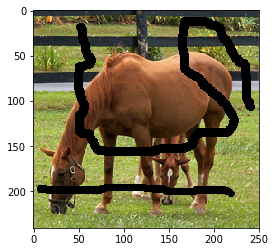

In [98]:
plt.imshow(image.rgb)